# Association Rule Learning with Apriori Analysis - Guitar Shop Example

* Apriori[1] is an algorithm for frequent item set mining and association rule learning over relational databases. It proceeds by identifying the frequent individual items in the database and extending them to larger and larger item sets as long as those item sets appear sufficiently often in the database. The frequent item sets determined by Apriori can be used to determine association rules which highlight general trends in the database: this has applications in domains such as market basket analysis [2].

* The Apriori algorithm even called Basket Analysis is generally applied for selling more items in supermarkets.

* However; if you want, you can use this algorithm for different topics in which you want to study on frequency. 

* The Question to be Answered is "which item combinations are frequently seem together".

* To answer this question for shopping topic, it is necessary to examine the transaction information of the customers and determine which products are bought together the most.

* In this study, I have shown two ways of applying basket analysis. In the first, I used a manual application by creating my own functions, and in the second, I used the apriori function from the mlxted library. Of course, using the apriori function is much easier and gives more detailed results. But the two apps offer the same results.

**Three Main Metrics**

* **Support**: 
    - Support(X,Y) = Freq(X,Y) / N
    - Probability of X and y occurring together = Freq of X and Y occurring together / Numb of All Transactions
    - If support value is high, it means that these pair of items are bought together much more 
    - The number of transactions in which a specific product (or combination of products) occurs[3].
    - The threshold value says that if one item are observed below the threshold value, it is not important for me
    
* **Confidence**
    - Confidence(X,Y) = Freq(X,Y) / Freq(X)
    - Probability of buying Y when X is bought = Freq of X and Y occurring together/ Freq of X
    - example 25% means that the association occurs 25% percentage of the case

    
    
* **Lift**
    - Lift = Support(X,Y) / (Support(X)*Support(Y))
    - When X is purchased, the probability of Y being bought increases by the lift value
    - performance metric 
    - lift of a rule is performance metric that indicates the strength of the association between the products in the rule[3]
    
    - If the lift of a rule is 1, then the products are independent of each other. Any rule that has a lift of 1 can be discarded[3].
    
    - If the lift of a rule is higher than 1, the lift value tells you how strongly the righthand side product depends on the left-hand side[3].

------------

**Story**: My music shop that only sells guitars opened recently. Thanks for the congratulations. Many customers visited the store and bought some guitar accessories. I noticed that some accessories are more in demand. Of course I want to earn more money, life is expensive. I thought if I could put some pairs of accessories together on the shelves, I could increase customers' transactions.

**Aim**: Create a dataset randomly contains guitar's parts transactions

**the idea**: Creating all kind of combination with the items in the list I created, and chosing randomly samples in it.  Each of elements represents one transaction information in new created list 

In [2]:
# function for show image 

def add_pic(image_list, x = 20, y = 15, rows = 1, path=""):

    import matplotlib.image as mpimg
    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(x, y))

    rows = rows
    columns = len(image_list)
    path = path

    for num, name in enumerate(image_list):
    
        fig.add_subplot(rows, columns, num+1)
    
        plt.imshow(mpimg.imread(path+name))
    
        plt.axis('off')
    
        plt.title(name)

## Parts of the Guitar

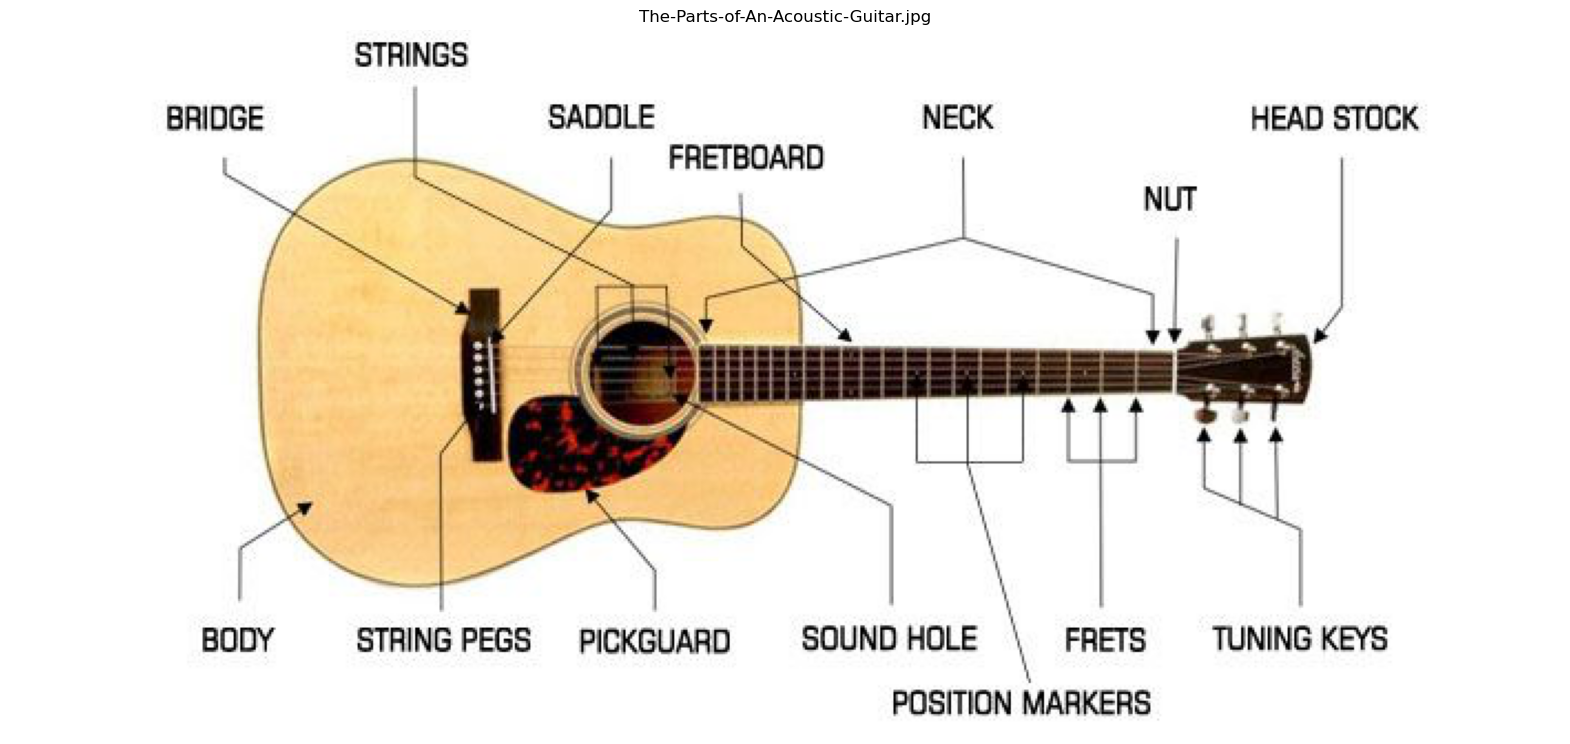

In [4]:
img_list = ["The-Parts-of-An-Acoustic-Guitar.jpg"]

add_pic(image_list = img_list, x = 20, y = 15, rows = 1, path="pic/")

#### import libraries

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations, chain
import random

## All Functions 

In [12]:
def create_apriori_dataset(item_list, n_comb=1, sample_value = 2, transformation= True, save=True, dataset_name ="apriori_analysis" ):
    
    
    """
    Parameters:
        - item_list = list of objects you want to analysis
        - n_comb = length of the iterable. Default value is 1. 
        - sample_value = sample value from the population. Default value is 2
        - transformation = Boolean. If True, transform data to 0 and 1. If False, the dataset variables'value are "True" and False".
        - save = Save the dataset as csv. Default is True.Boolean
        - dataset_name = output name of the dataset. Default name is "apriori_analysis"
        
    info:
        - if you get "ValueError: Sample larger than population or is negative" it is mean your sample_value bigger than number of observations,
        In this case you can incerase the n_comb value or degrease the sample_value
        
    Return:
    
        - dataframe
        
    Example:
        basket_list = [flour, sugar,tea,bread,pasta,buttermilk,cheese,chocolate,detergent,toothpaste]
            
        df_marine = create_apriori_dataset(item_list = basket_list, n_comb=4, sample_value = 100,
                                             save = True, dataset_name = "market")
                                        
    Info:
        to calculate max sample value for creating dataset according to given n_comb: 
        
        Ex:
        n_comb = 3
        len of item list = 8
        max sample_value = (8/1) + (8*7/2*1) + (8*7*6/3*2*1)  = 92
        
    """
    
    comb_list = [[b  for b in combinations(item_list, r)] for r in range(1 , n_comb+1)]
    
    comb_list_sum = list(chain.from_iterable(comb_list))
    
    comb_random = random.sample(comb_list_sum, sample_value)
    
    df_new = pd.DataFrame()

    df_new["products"] = comb_random

    df_new.set_index("products", inplace = True)
    
    for i in range(len(item_list)):
    
        df_new[i] = 0

    df_new.columns = item_list
    
    for i in range(len(item_list)):
    
        for ii in range(len(df_new)):
        
            df_new.iloc[ii,i] = df_new.columns[i] in df_new.index[ii]
            
    if transformation:
        
        df_new = df_new.astype(int)
    
    

    if save:
        
        df_new.to_csv(dataset_name+".csv")
        
    return df_new                                     

In [13]:
def one_apriori(dataframe, Support=False, support_value = 0.01):
    
    """
    Parameters:
        dataframe : initial dataframe for the apriori analysis. 
        Support: If True apply Support Threshold to eliminate below products. Default value is False
        support_value: support threshold value. Default value  = 0.2
        
    Info:
        This function calculate freq and support values of the each individual item in the transactions.
        
    Return:
        df_new : Dataframe
    """
    
    # frequency   
    freq = dataframe.sum()
        
    #support value
    support_values = freq.agg(lambda x: x / dataframe.shape[0])
        
    #dataframe
    df_new = pd.DataFrame(support_values, columns = ["Support"])

    df_new = df_new.sort_values("Support", ascending = False)

    df_new["Freq"] = freq

    # Constant Confidence anf lift values 

    df_new["Confidence"] = 1

    df_new["Lift"] = np.NaN
        
    # Apply Support Threshold

    if Support:

        df_new = df_new.loc[(df_new["Support"] >= support_value)]

    return df_new
        

In [14]:
def two_apriori(dataframe , dataframe_1 , Support = False, support_value = 0.01 ):
    
    """
    Parameters:
        dataframe : initial dataframe for the apriori analysis
        dataframe_1 : first step output dataframe which contains individual products
        Support: If "True", apply Support Threshold to eliminate products under this value. Default boolean value is False
        support_value: support threshold value. Default value  = 0.2
        
    Info:
        This function calculates the frequency and support values of coexistence product pairs in each transaction.
        
    Return:
        df_new : Dataframe
    """
    
    # combination of two items
    item_list= [list(i) for i in combinations(dataframe_1.index, 2)]
    

    # FIND ITEMS MATCHED WITH COMBINATION
    values_ = []
    freq = []

    for i in range(len(item_list)):
        
    # try:  if the combination has not any items with given support value, dont break
        try:

            items = dataframe[dataframe[item_list[i]].sum(axis=1) == len(item_list[i])]

            item_support = len(items) / dataframe.shape[0]

            values_.append(item_support)

            freq.append(len(items))

        except (KeyError) as Error :

            print("No items:",Error) 
            
            
    # DATAFRAME with FREQ and SUPPORT VARIABLES
    
    # support value
    df_new = pd.DataFrame(values_, columns=["Support"])
    
    # item frequency
    df_new["Freq"] = freq
    
    # to set index add items to dataframe
    df_new["products"] = item_list

    df_new = df_new.set_index("products")
    
    # sort
    df_new = df_new.sort_values(by = "Support", ascending=False)


    # CONFIDENCE
    list_conf = []
    # iterate in each index in df_new
    for i in range(len(df_new)):


        conf = df_new.Freq[i] / dataframe_1.loc[[df_new.index[i][0]]]["Freq"]

        list_conf.append(np.round(conf[0],2))
        
    df_new["Confidence"] = list_conf
    

    # LIFT
    list_lift = []
    for i in range(len(df_new)):

        lift = df_new.Support[i] / (dataframe_1.loc[[df_new.index[i][0]]].Support[0] * dataframe_1.loc[[df_new.index[i][1]]].Support[0])

        list_lift.append(np.round(lift,3))


    df_new["Lift"] = list_lift
    
    
    # SUPPORT THRESHOLD 
    
    if Support:
    
        df_new = df_new.loc[df_new["Support"] >= support_value ]
    
    return df_new

In [26]:
def more_apriori(dataframe, dataframe_1, dataframe_2 , Support = False, support_value = 0.01 ):
    
    """
    Parameters:
        dataframe : initial dataframe for the apriori analysis
        dataframe_1 : first step output dataframe which contains individual products
        dataframe_2 : one of the the other steps output (ex. df_two, df_three,df_four) dataframe which contains combined products
        Support: If "True", apply Support Threshold to eliminate products under this value. Default boolean value is False
        support_value: support threshold value. Default value  = 0.2
        
    Info:
        - This function calculates the frequency and support values of coexistence product combinations(more than two)
        in each transaction.
        - one_apriori and two_apriori functions should be done before this function.

        
    Return:
        df_new : Dataframe
        
    Ex:
        df_three = more_apriori(df, df_one, df_two, Support = True, support_value = 0.05)
    Ex:    
        df_four = more_apriori(df, df_one, df_three)
    """
    
    # finding probable combination of the pairs
    item_list = [i for i in combinations(dataframe_2.index, 2)]

    # to get unique combinations of the items 
    item_list_set = []

    for i in range(len(item_list)):

        chain_ = set(chain.from_iterable(item_list[i]))

        if chain_ not in item_list_set:

            item_list_set.append(chain_)

    # set to list for easy iteration
    set_to_list = [list(item_list_set[i]) for i in range(len(item_list_set))]
    
    # FIND ITEMS MATCHED WITH COMBINATION
    values_ = []
    freq = []

    for i in range(len(set_to_list)):

        try:

            items = dataframe[dataframe[set_to_list[i]].sum(axis=1) == len(set_to_list[i])]

            item_support = len(items) / dataframe.shape[0]

            values_.append(item_support)

            freq.append(len(items))

        except (KeyError) as Error :

            print("No items:",Error)
            
    # DATAFRAME with FREQ and SUPPORT VARIABLES

    df_new = pd.DataFrame(values_, columns=["Support"])

    df_new["products"] = set_to_list

    df_new["Freq"] = freq

    df_new = df_new.set_index("products")

    df_new = df_new.sort_values(by = "Support", ascending=False)


    # CONFIDENCE
    
    list_conf = []
    
    for i in range(len(df_new)):
    
        conf = df_new.Freq[i] / dataframe_1.loc[[df_new.index[i][0]]]["Freq"]

        list_conf.append(np.round(conf[0],2))
        
    df_new["Confidence"] = list_conf
    

    # LIFT
    
    list_lift = [] 
    list_support_multiple = []
    
    for i in range(len(df_new)):

        list_support = []

        for ii in range(len(df_new.index[i])):

            list_support.append(dataframe_1.loc[[df_new.index[i][ii]]].Support[0])

        list_support_multiple.append(np.round(np.prod(list_support),3))

        lift = df_new.Support[i] / list_support_multiple[i]

        list_lift.append(np.round(lift,3))


    df_new["Lift"] = list_lift
    
    
    # SUPPORT THRESHOLD 
    
    if Support:
    
        df_new = df_new.loc[df_new["Support"] >= support_value]
    
    return df_new

In [16]:
# function for concat the dataframes and apply support threshold

def combine_apriori(dataframes_list ,Support = False, support_value = 0.01):
    
    df_new = pd.concat(dataframes)
    
        # SUPPORT THRESHOLD 
    
    if Support:
    
        df_new = df_new.loc[df_new["Support"] >= support_value]
    
    return df_new

------------------
-------------
--------------

# Application

#### list of a guitar's parts

In [17]:
# pick: the item to play guitar by hit the strings
# tuner: the item to accord strings 

list_of_guitar_acces = ["String", "Bridge", "String Pegs", "Tuning Keys", "Nut", "Pick Guard", "Fret", "Saddle", "Pick", "Tuner"]

----------

### Step - 1 Create Dataset

In [18]:
df_guitar = create_apriori_dataset(item_list = list_of_guitar_acces,
                       n_comb=4, 
                       sample_value = 100, 
                       transformation= True, 
                       save=True, 
                       dataset_name ="guitar_apriori_analysis" )

---------------

### Step - 2 analysis for unique items

In [21]:
df_one = one_apriori(df_guitar)
df_one

,Support,Freq,Confidence,Lift
String Pegs,0.38,38,1,NaN
Saddle,0.38,38,1,NaN
Tuner,0.37,37,1,NaN
String,0.35,35,1,NaN
Bridge,0.34,34,1,NaN
Fret,0.33,33,1,NaN
Tuning Keys,0.31,31,1,NaN
Pick Guard,0.31,31,1,NaN
Nut,0.30,30,1,NaN
Pick,0.27,27,1,NaN


-----------

### Step - 3 analysis for pairs of items

In [23]:
df_two = two_apriori(df_guitar, df_one)
df_two.head(10)

,Support,Freq,Confidence,Lift
products,,,,
"[Tuner, Fret]",0.15,15,0.41,1.229
"[Tuner, String]",0.14,14,0.38,1.081
"[String Pegs, Saddle]",0.13,13,0.34,0.900
"[String Pegs, Fret]",0.13,13,0.34,1.037
"[Saddle, Nut]",0.13,13,0.34,1.140
"[Tuning Keys, Pick Guard]",0.12,12,0.39,1.249
"[String Pegs, Tuner]",0.12,12,0.32,0.853
"[Bridge, Tuning Keys]",0.12,12,0.35,1.139
"[String Pegs, Tuning Keys]",0.12,12,0.32,1.019


-----------

### Step - 4 analysis for three of items

In [27]:
df_three = more_apriori(df_guitar, df_one,df_two)
df_three.head(10)

,Support,Freq,Confidence,Lift
products,,,,
"[Saddle, String Pegs, Fret]",0.05,5,0.13,1.042
"[Pick Guard, Tuning Keys, Bridge]",0.05,5,0.16,1.515
"[String, Tuner, Bridge]",0.05,5,0.14,1.136
"[Pick Guard, String Pegs, Tuning Keys]",0.05,5,0.16,1.351
"[String, Pick, Tuner]",0.05,5,0.14,1.429
"[Fret, Tuner, String Pegs]",0.05,5,0.15,1.087
"[Saddle, Tuner, Nut]",0.04,4,0.11,0.952
"[Saddle, Nut, Bridge]",0.04,4,0.11,1.026
"[String, String Pegs, Nut]",0.04,4,0.11,1.000


---------

### Step - 5 Combine the dataframes

In [28]:
# apply the function

dataframes = [df_two,df_three]

df_combine = combine_apriori(dataframes, Support = True,support_value= 0.095)

In [31]:
df_combine.sort_values(by ="Support",ascending = False).head(10)

,Support,Freq,Confidence,Lift
products,,,,
"[Tuner, Fret]",0.15,15,0.41,1.229
"[Tuner, String]",0.14,14,0.38,1.081
"[String Pegs, Saddle]",0.13,13,0.34,0.900
"[String Pegs, Fret]",0.13,13,0.34,1.037
"[Saddle, Nut]",0.13,13,0.34,1.140
"[Tuning Keys, Pick Guard]",0.12,12,0.39,1.249
"[String Pegs, Tuner]",0.12,12,0.32,0.853
"[Bridge, Tuning Keys]",0.12,12,0.35,1.139
"[String Pegs, Tuning Keys]",0.12,12,0.32,1.019


## Interpretation

* to interpretaion we can chose of the metrics which are support, confidence or lift)
* Tuner and Fret appear together in 15% of all transactions (support).
* In other words, Tuner and Fret are seen together in 15 out of 100 transactions.
* 41% of customers who buy tuners also buy Fret (confidence)
* Fret product sales increase 1.29 times in purchases with Tuner (lift)

-----------

# Apriori Analysis with mlxtend [4]

In [40]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [41]:
df = pd.read_csv("apriori_analysis.csv", index_col=[0])

In [42]:
df = df.astype(bool)

In [43]:
df_apriori = apriori(df, min_support = 0.01, use_colnames = True)

In [44]:
df_apriori

,support,itemsets
0,0.34,(String)
1,0.25,(Bridge)
2,0.27,(Bridge Pin)
3,0.26,(Tuning pegs)
4,0.23,(Nut)
...,...,...
117,0.01,"(Pick, Fret, Pick Guard)"
118,0.01,"(Tuners, Fret, Pick Guard)"
119,0.01,"(Saddle, Pick, Fret)"
120,0.01,"(Pick, Fret, Tuners)"


In [45]:
df_rules = association_rules(df_apriori, metric = "support", min_threshold = 0.01)

In [46]:
df_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bridge),(String),0.25,0.34,0.08,0.320000,0.941176,-0.0050,0.970588
1,(String),(Bridge),0.34,0.25,0.08,0.235294,0.941176,-0.0050,0.980769
2,(Bridge Pin),(String),0.27,0.34,0.06,0.222222,0.653595,-0.0318,0.848571
3,(String),(Bridge Pin),0.34,0.27,0.06,0.176471,0.653595,-0.0318,0.886429
4,(Tuning pegs),(String),0.26,0.34,0.06,0.230769,0.678733,-0.0284,0.858000
...,...,...,...,...,...,...,...,...,...
487,"(Saddle, Tuners)",(Pick),0.04,0.24,0.01,0.250000,1.041667,0.0004,1.013333
488,"(Pick, Tuners)",(Saddle),0.04,0.23,0.01,0.250000,1.086957,0.0008,1.026667
489,(Saddle),"(Pick, Tuners)",0.23,0.04,0.01,0.043478,1.086957,0.0008,1.003636
490,(Pick),"(Saddle, Tuners)",0.24,0.04,0.01,0.041667,1.041667,0.0004,1.001739


### Reference

- 1. Rakesh Agrawal and Ramakrishnan Srikant. Fast algorithms for mining association rules. Proceedings of the 20th International Conference on Very Large Data Bases, VLDB, pages 487-499, Santiago, Chile, September 1994.

- 2. Wikipedia. https://en.wikipedia.org/wiki/Apriori_algorithm

- 3. Joos Korstanje. The Apriori algorithm. https://towardsdatascience.com/the-apriori-algorithm-5da3db9aea95
- 4. mlxtend.apriori. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/